<a href="https://colab.research.google.com/github/vaishaliojha08-sys/FirstModel/blob/main/FirstModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X.shape, y.shape


((891, 11), (891,))

In [5]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = DummyClassifier(strategy='most_frequent')

baseline_model.fit(X_train,y_train)

y_pred = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for Dummy Classifier is: {accuracy:.4f}")

precision = precision_score(y_test,y_pred)
print(f"Precision for Dummy Classifier is: {precision:.4f}")

recall = recall_score(y_test,y_pred)
print(f"Recall for Dummy Classifier is: {recall:.4f}")






Accuracy for Dummy Classifier is: 0.5866
Precision for Dummy Classifier is: 0.0000
Recall for Dummy Classifier is: 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
print(df.isna().sum())

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,False,True


In [9]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_Q','Embarked_S']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc_logistic = accuracy_score(y_test, y_pred)
print(f"Accuracy for logistic regression is: {acc_logistic:.4f}")

precision_logistic = precision_score(y_test,y_pred)
print(f"Precision for Dummy Classifier is: {precision_logistic:.4f}")

recall_logistic = recall_score(y_test,y_pred)
print(f"Recall for Dummy Classifier is: {recall_logistic:.4f}")

Accuracy for logistic regression is: 0.8101
Precision for Dummy Classifier is: 0.7857
Recall for Dummy Classifier is: 0.7432


In [10]:
probabilities = model.predict_proba(X_test)[:,1]
y_pred_07 = (probabilities>=0.7).astype(int)

print(f"Accuracy at 0.7: {accuracy_score(y_test, y_pred_07):.4f}")
print(f"Precision at 0.7: {precision_score(y_test, y_pred_07):.4f}")
print(f"Recall at 0.7: {recall_score(y_test, y_pred_07):.4f}")

Accuracy at 0.7: 0.7989
Precision at 0.7: 0.9318
Recall at 0.7: 0.5541


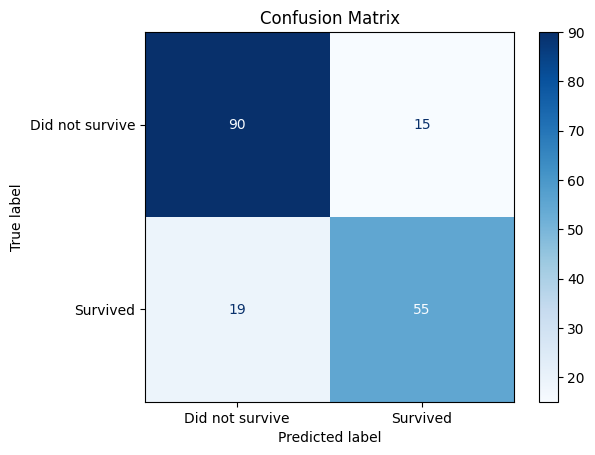

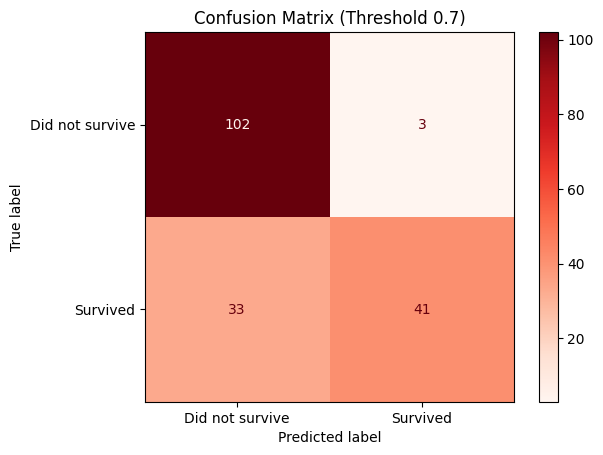

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm_07 = confusion_matrix(y_test, y_pred_07)

display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels= ['Did not survive','Survived'])
display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


display_07 = ConfusionMatrixDisplay(confusion_matrix=cm_07,
                                 display_labels= ['Did not survive','Survived'])
display_07.plot(cmap=plt.cm.Reds)

plt.title('Confusion Matrix (Threshold 0.7)')
plt.show()

In [19]:
#Task 1: Train a Random Forest classifier on the Titanic dataset.
#Task 2: Identify the top 3 features contributing to prediction errors.

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print(f"Accuracy for RandomForest is:",accuracy_score(y_test,y_pred))



errors = X_test[y_test != y_pred]

features_importance = pd.DataFrame(
    {
        "Features": X.columns,
        "Importance": rf.feature_importances_
    }
).sort_values(by = "Importance", ascending = False)

print("\n Top 3 features contributing most to the errors:")
print(features_importance.head(3))



Accuracy for RandomForest is: 0.8100558659217877

 Top 3 features contributing most to the errors:
  Features  Importance
5     Fare    0.279199
1      Sex    0.266967
2      Age    0.249413


In [23]:
#Task 1: Train Logistic Regression on multiple features (Pclass, Sex, Age).
#Task 2: Predict and evaluate accuracy.

X = df[['Pclass','Sex','Age']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

test_accuracy = accuracy_score(y_test,y_pred)
train_accuracy = accuracy_score(y_train, lr.predict(X_train))

print(f"Test Accuracy on limited features for logistic regression is:{test_accuracy}")
print(f"Train Accuracy on limited features for logistic regression is:{train_accuracy}")

Test Accuracy on limited features for logistic regression is:0.8100558659217877
Train Accuracy on limited features for logistic regression is:0.7921348314606742


In [34]:
#Task 1: Compute confusion matrix for Logistic Regression predictions.
#Task 2: Identify most frequent error type.

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score

cm = confusion_matrix(y_test,y_pred, labels = [1,0
                                               ])

tn, fp, fn, tp = cm.ravel()

print("Confusion matrix: \n",cm)

if(fp>fn):
  print("Most frequent errors: False positives")
else:
  print("Most frequent errors: False negatives")

Confusion matrix: 
 [[54 20]
 [14 91]]
Most frequent errors: False positives


In [39]:
#Task 1: Calculate precision & recall.
#Task 2: Explain which metric matters more for survival prediction.

precision_lr = precision_score(y_test,y_pred)
recall_lr = recall_score(y_test,y_pred)

print(f"Precision on limited features for logistic regression is:{precision_lr:.4f}")
print(f"Recall on limited features for logistic regression is:{recall_lr:.4f}")

print("""Explanation:\n
Recall is an important metric because it calculates the FN which
means predicting a person will not survive
when they actually would.""")

Precision on limited features for logistic regression is:0.7941
Recall on limited features for logistic regression is:0.7297
Explanation:
 
Recall is an important metric because it calculates the FN which
means predicting a person will not survive
when they actually would.


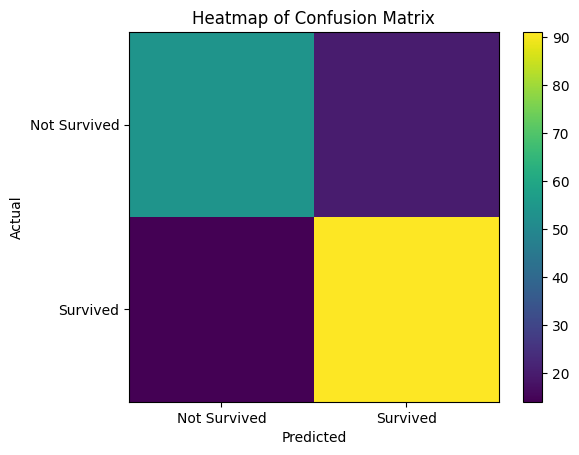

In [41]:
#Task 1: Create a confusion matrix for Logistic Regression predictions.
#Task 2: Visualize it as a heatmap with labels for TP, TN, FP, FN.

plt.figure()
plt.imshow(cm)
plt.title("Heatmap of Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0,1],['Not Survived','Survived'])
plt.yticks([0,1],['Not Survived','Survived'])
plt.colorbar()
plt.show()

Misclassification by Pclass: Pclass
1    11
2     6
3    17
Name: is_error, dtype: int64


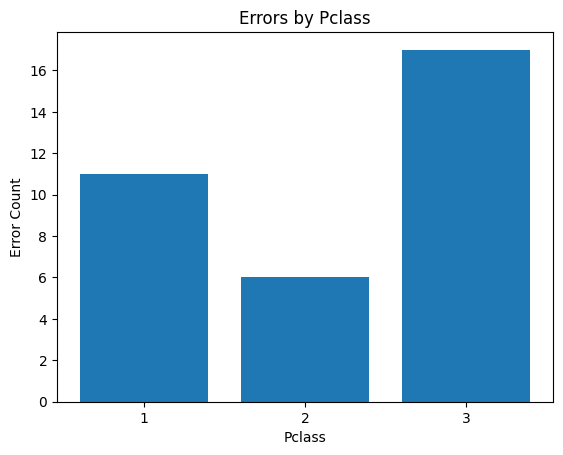

In [44]:
#Task 1: Find which Pclass has most misclassifications.
#Task 2: Visualize errors by Pclass.

errors = X_test.copy()
errors['actual'] = y_test
errors['pred'] = y_pred
errors['is_error'] = errors['actual'] != errors['pred']

error_by_pclass = errors.groupby('Pclass')['is_error'].sum()

print("Misclassification by Pclass:",error_by_pclass)

plt.figure()
plt.bar(error_by_pclass.index.astype(str),error_by_pclass.values)
plt.title("Errors by Pclass")
plt.xlabel('Pclass')
plt.ylabel('Error Count')
plt.show()

In [45]:
#Task 1: Compare training vs test accuracy for Logistic Regression.
#Task 2: Decide if model has high bias or high variance.

print(f"Test Accuracy on limited features for logistic regression is:{test_accuracy}")
print(f"Train Accuracy on limited features for logistic regression is:{train_accuracy}")

if(abs(train_accuracy - test_accuracy))< 0.05:
  print("Model shows HIGH BIAS (underfitting) rather than high variance.")
else:
  print("Model shows HIGH variance (overfitting)")



Test Accuracy on limited features for logistic regression is:0.8100558659217877
Train Accuracy on limited features for logistic regression is:0.7921348314606742
Model shows HIGH BIAS (underfitting) rather than high variance.
